In [1]:
import os
import re
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.action_chains import ActionChains
import time
import sys
import pyperclip as pc
import pandas as pd
import json
"""
Read a text file that contains the web site to connect and the instructions to login.
Typicaly buton click text to fill... 
"""
def click_buton(xpath):
    button = driver.find_element_by_xpath(xpath)
    button.click()

def fill_text(xpath, text):
    text_box = driver.find_element_by_xpath(xpath)
    text_box.send_keys(text)

In [2]:
driver = webdriver.Chrome()

In [3]:
driver.get('https://www.youtube.com/')

In [4]:
accept_button_xpath = '/html/body/ytd-app/ytd-consent-bump-v2-lightbox/tp-yt-paper-dialog/div[4]/div[2]/div[5]/div[2]/ytd-button-renderer[2]/a/tp-yt-paper-button'
click_buton(xpath = accept_button_xpath)

In [5]:
playlists = ['YEAR 1 - WW2 - 1939/40', 'YEAR 2 - WW2 - 1940/41', 'YEAR 3 - WW2 - 1941/42', 'YEAR 4 - WW2 - 1942/43']

In [6]:
search_path = '/html/body/ytd-app/div/div/ytd-masthead/div[3]/div[2]/ytd-searchbox/form/div[1]/div[1]/input'
fill_text(search_path, text = playlists[0])

In [7]:
search_button= '/html/body/ytd-app/div/div/ytd-masthead/div[3]/div[2]/ytd-searchbox/button'
click_buton(xpath = search_button)

In [8]:
probable_but = '/html/body/ytd-app/div/ytd-page-manager/ytd-search/div[1]/ytd-two-column-search-results-renderer/div/ytd-section-list-renderer/div[2]/ytd-item-section-renderer/div[3]/ytd-playlist-renderer/div/yt-formatted-string[2]/a'
click_buton(xpath = probable_but)

In [62]:
pathx = '/html/body/ytd-app/div/ytd-page-manager/ytd-browse[2]/ytd-two-column-browse-results-renderer/div[1]/ytd-section-list-renderer/div[2]/ytd-item-section-renderer'
elem = driver.find_element_by_xpath(pathx)

In [25]:
for i in range(1,100):
    driver.execute_script(f"window.scrollTo(0, {i}00)")
    time.sleep(0.1)
# pathx = '/html/body/ytd-app/div/ytd-page-manager/ytd-browse[2]/ytd-two-column-browse-results-renderer/div[1]/ytd-section-list-renderer/div[2]/ytd-item-section-renderer'
# elem = driver.find_element_by_xpath(pathx)

In [18]:
driver.execute_script("window.scrollTo(0, 2000)")

In [86]:
data = []
for playlist in playlists:
    search_path = '/html/body/ytd-app/div/div/ytd-masthead/div[3]/div[2]/ytd-searchbox/form/div[1]/div[1]/input'
    fill_text(search_path, text = playlist)
    search_button= '/html/body/ytd-app/div/div/ytd-masthead/div[3]/div[2]/ytd-searchbox/button'
    click_buton(xpath = search_button)
    probable_but = '/html/body/ytd-app/div/ytd-page-manager/ytd-search/div[1]/ytd-two-column-search-results-renderer/div/ytd-section-list-renderer/div[2]/ytd-item-section-renderer/div[3]/ytd-playlist-renderer/div/yt-formatted-string[2]/a'
    time.sleep(2)
    click_buton(xpath = probable_but)
    pathx = '/html/body/ytd-app/div/ytd-page-manager/ytd-browse[2]/ytd-two-column-browse-results-renderer/div[1]/ytd-section-list-renderer/div[2]/ytd-item-section-renderer'
    time.sleep(2)
    for i in range(1,100):
        driver.execute_script(f"window.scrollTo(0, {i}00)")
        time.sleep(0.1)
    try:
        reset_buton = '/html/body/ytd-app/div/div/ytd-masthead/div[3]/div[2]/ytd-searchbox/form/div[1]/div[2]/ytd-button-renderer/a/yt-icon-button/button/yt-icon'
        click_buton(xpath = reset_buton)
    except:
        pass
    time.sleep(2)
    pathx = '/html/body/ytd-app/div/ytd-page-manager/ytd-browse[2]/ytd-two-column-browse-results-renderer/div[1]/ytd-section-list-renderer/div[2]/ytd-item-section-renderer'
    elem = driver.find_element_by_xpath(pathx)
    titles = elem.text.split('\nWorld War Two\n')
    for title in titles:
        try:
            month = title.split('-')[-1].split()[0]
            day = title.split('-')[-1].split()[1].replace(',', '')
            year = title.split('-')[-1].split()[2].replace(',', '')
        except:
            month = title.split('-')[-1].split()[0]
            day = ''
            year = title.split('-')[-1].split()[1].replace(',', '')
        if len(day)> 2:
            temp_day = day
            day = month 
            month = temp_day
        title_name = ' -'.join(title.split('\n')[2].split(' -')[:-1])
        duration = title.split('\n')[1]
        minutes = int(duration.split(':')[-2])
        secondes = int(duration.split(':')[-1])
        secondes += 60 * minutes
        data += [(day, month, year, title_name, secondes)]

In [43]:
import pandas as pd

In [87]:
df = pd.DataFrame(data, columns=['Day', 'Month', 'Year', 'Title', 'Duration [s]'])

In [88]:
df

,Day,Month,Year,Title,Duration [s]
0,1,September,1939,001 -The Polish-German War - WW2,697
1,8,September,1939,002 - World War Two Begins - WW2,697
2,15,September,1939,003 - Poland on Her Own - WW2,687
3,22,September,1939,004 - The Russians are Coming! - The Soviet In...,729
4,29,September,1939,005 - Poland is Crushed - WW2,648
...,...,...,...,...,...
217,13,November,1942,168 - Axis and Allies Both Invade France - WW2,1329
218,November,1942,Pt.,Fighting Nazis with Radios and Funerals - WAH 046,905
219,November,20th,1942,169 - The Red Army Kicks Ass - Operation Uranu...,1165
220,27,November,1942,170 - Bigger Than Uranus? - Mars - WW2,1244


In [89]:
df.to_csv('duration_videos.csv', index=False)

In [58]:
import matplotlib.pyplot as plt

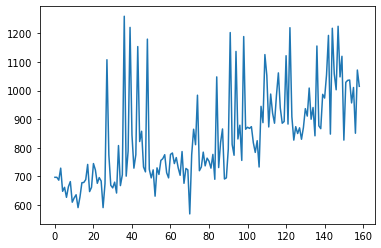

In [76]:
plt.plot(df['Duration [s]'])

In [63]:
# list(map(lambda: 
# duration = list(map(lambda x: x.split('\n'), elem.text.split('\nWorld War Two\n'))
titles = list(map(lambda x: x.split('\n')[-1] ,elem.text.split('\nWorld War Two\n')))  
titles = elem.text.split('\nWorld War Two\n')
title = titles[0]
titles

['1\n17:47\n158 - This War is Three Years Old - WW2 - September 4, 1942',
 '2\n15:27\n159 - Hitler Finally Fed Up with his Army - WW2 - September 11, 1942',
 "3\n13:34\n159B - Stalingrad, Hitler's Obsession - WW2 - September 13, 1942",
 '4\n20:00\n160 - Stalingrad Falls? - WW2 - September 18, 1942',
 '5\n16:39\n161 - Stalingrad, Factory by Factory, Room by Room - WW2 - September 25, 1942',
 '6\n16:31\nHow Britain Oppressed India - WAH 043 - September 1942, Pt. 2',
 '7\n19:03\n162 - This is Russia, The Soviet Thermopylae - WW2 - October 2, 1942',
 '8\n17:41\n163 - Stalingrad Thunderdome: Paulus vs. Chuikov! - WW2 - October 9, 1942',
 '9\n16:40\nResist. Collaborate. Die. - WAH 044 - October 1942, Pt. 1',
 '10\n20:13\n164 - Stalingrad, Stalingrad, Stalingrad, No Retreat! - WW2 - October 16, 1942',
 '11\n18:16\n165 - Showdown at El Alamein - WW2 - October 23, 1942',
 '12\n20:29\n166 - Nazi General Dies of Heart Attack - WW2 - October 30, 1942',
 '13\n17:25\nA United Front Against Nazi Atro

In [39]:
data = []
for title in titles:
    try:
        month = title.split('-')[-1].split()[0]
        day = title.split('-')[-1].split()[1].replace(',', '')
        year = title.split('-')[-1].split()[2].replace(',', '')
    except:
        month = title.split('-')[-1].split()[0]
        day = ''
        year = title.split('-')[-1].split()[1].replace(',', '')
    title_name = title.split(' -')[1]
    duration = title.split('\n')[1]
    minutes = int(duration.split(':')[-2])
    secondes = int(duration.split(':')[-1])
    secondes += 60 * minutes
    data += [(day, month, year, title_name, secondes)]

In [37]:
title.split('-')[-1].split()

['April', '1940']

In [40]:
data

[('1', 'September', '1939', 'The Polish-German War', 697),
 ('8', 'September', '1939', ' World War Two Begins', 697),
 ('15', 'September', '1939', ' Poland on Her Own', 687),
 ('22', 'September', '1939', ' The Russians are Coming!', 729),
 ('September', '29', '1939', ' Poland is Crushed', 648),
 ('6', 'October', '1939', ' Poland Falls and China Rises', 662),
 ('October', '13', '1939', " The Baltic in Stalin's Squeeze", 627),
 ('20', 'October', '1939', ' The Submarine War', 664),
 ('27', 'October', '1939', " Stalin's Murderous Adventures", 682),
 ('November',
  '3',
  '1939',
  " Molotov's Heel on Finland and the Phoney War",
  610),
 ('November', '10', '1939', ' Hitler Almost Killed', 625),
 ('November', '17', '1939', ' The Mysterious Threat to the Royal Navy', 636),
 ('November', '24', '1939', ' Will the Kriegsmarine Rule the Waves?', 591),
 ('1', 'December', '1939', ' The Winter War', 628),
 ('December', '8', '1939', ' The Invasion of Finland', 678),
 ('December', '15', '1939', ' Per

In [33]:
duration = title.split('\n')[1]
minutes = int(duration.text.split(':')[-2])
secondes = int(duration.text.split(':')[-1])
secondes += 60 * minutes
duration

'11:37'

In [30]:
print(day, month, year)

1 September 1939


In [31]:
title_name

'The Polish-German War'

In [13]:
titles

['001 -The Polish-German War - WW2 - September 1, 1939 [IMPROVED]',
 '002 - World War Two Begins - WW2 - September 8, 1939 [IMPROVED]',
 '003 - Poland on Her Own - WW2 - September 15, 1939 [IMPROVED]',
 '004 - The Russians are Coming! - The Soviet Invasion of Poland - WW2 -September 22, 1939 [IMPROVED]',
 '005 - Poland is Crushed - WW2 - 29 September, 1939 [IMPROVED]',
 '006 - Poland Falls and China Rises - WW2 - October 6, 1939 [IMPROVED]',
 "007 - The Baltic in Stalin's Squeeze - WW2 - 13 October, 1939 [IMPROVED]",
 '008 - The Submarine War - WW2 - October 20, 1939 [IMPROVED]',
 "009 - Stalin's Murderous Adventures - Occupation of Poland - WW2 - October 27, 1939 [IMPROVED]",
 "010 - Molotov's Heel on Finland and the Phoney War - WW2 - 3 November, 1939 [IMPROVED]",
 '011 - Hitler Almost Killed - WW2 - 10 November, 1939 [IMPROVED]',
 '012 - The Mysterious Threat to the Royal Navy - Magnetic Mines - WW2 - 17 November, 1939 [IMPROVED]',
 '013 - Will the Kriegsmarine Rule the Waves? - WW2

In [79]:
reset_buton = '/html/body/ytd-app/div/div/ytd-masthead/div[3]/div[2]/ytd-searchbox/form/div[1]/div[2]/ytd-button-renderer/a/yt-icon-button/button/yt-icon'
click_buton(xpath = reset_buton)

In [16]:
try:
    reset_buton = '/html/body/ytd-app/div/div/ytd-masthead/div[3]/div[2]/ytd-searchbox/form/div[1]/div[2]/ytd-button-renderer/a/yt-icon-button/button/yt-icon'
    click_buton(xpath = reset_buton)
except:
    pass

search_path = '/html/body/ytd-app/div/div/ytd-masthead/div[3]/div[2]/ytd-searchbox/form/div[1]/div[1]/input'
fill_text(search_path, text = '-'.join(titles[1].split('-')[2:]))
search_button= '/html/body/ytd-app/div/div/ytd-masthead/div[3]/div[2]/ytd-searchbox/button'
click_buton(xpath = search_button)

In [12]:
pathx = '/html/body/ytd-app/div/ytd-page-manager/ytd-search/div[1]/ytd-two-column-search-results-renderer/div/ytd-section-list-renderer/div[2]/ytd-item-section-renderer/div[3]/ytd-video-renderer[1]/div[1]/ytd-thumbnail/a/div[1]/ytd-thumbnail-overlay-time-status-renderer/span'
time = driver.find_element_by_xpath(pathx)

In [13]:
minutes = int(time.text.split(':')[-2])
secondes = int(time.text.split(':')[-1])
secondes += 60 * minutes

In [14]:
secondes

697

In [39]:
data = []
for playlist in playlists:
    search_path = '/html/body/ytd-app/div/div/ytd-masthead/div[3]/div[2]/ytd-searchbox/form/div[1]/div[1]/input'
    fill_text(search_path, text = playlist)
    search_button= '/html/body/ytd-app/div/div/ytd-masthead/div[3]/div[2]/ytd-searchbox/button'
    click_buton(xpath = search_button)
    probable_but = '/html/body/ytd-app/div/ytd-page-manager/ytd-search/div[1]/ytd-two-column-search-results-renderer/div/ytd-section-list-renderer/div[2]/ytd-item-section-renderer/div[3]/ytd-playlist-renderer/div/yt-formatted-string[2]/a'
    time.sleep(2)
    click_buton(xpath = probable_but)
    pathx = '/html/body/ytd-app/div/ytd-page-manager/ytd-browse[2]/ytd-two-column-browse-results-renderer/div[1]/ytd-section-list-renderer/div[2]/ytd-item-section-renderer'
    time.sleep(2)
    elem = driver.find_element_by_xpath(pathx)
    titles = list(map(lambda x: x.split('\n')[-1] ,elem.text.split('\nWorld War Two\n')))  
    for title in titles:
        month = title.split('-')[-1].split()[0]
        day = title.split('-')[-1].split()[1].replace(',', '')
        year = title.split('-')[-1].split()[2].replace(',', '')
        title_name = title.split(' -')[1]
        try:
            reset_buton = '/html/body/ytd-app/div/div/ytd-masthead/div[3]/div[2]/ytd-searchbox/form/div[1]/div[2]/ytd-button-renderer/a/yt-icon-button/button/yt-icon'
            click_buton(xpath = reset_buton)
        except:
            pass

        search_path = '/html/body/ytd-app/div/div/ytd-masthead/div[3]/div[2]/ytd-searchbox/form/div[1]/div[1]/input'
        fill_text(search_path, text = '-'.join(title.split('-')[2:]))
        search_button= '/html/body/ytd-app/div/div/ytd-masthead/div[3]/div[2]/ytd-searchbox/button'
        click_buton(xpath = search_button)
        time.sleep(2)
        pathx = '/html/body/ytd-app/div/ytd-page-manager/ytd-search/div[1]/ytd-two-column-search-results-renderer/div/ytd-section-list-renderer/div[2]/ytd-item-section-renderer/div[3]/ytd-video-renderer[1]/div[1]/ytd-thumbnail/a/div[1]/ytd-thumbnail-overlay-time-status-renderer/span'
        duration = driver.find_element_by_xpath(pathx)
        minutes = int(duration.text.split(':')[-2])
        secondes = int(duration.text.split(':')[-1])
        secondes += 60 * minutes
        data += [(title_name, day, month, year, secondes)]
  

KeyboardInterrupt: 

In [41]:
titles[3]

'004 - The Russians are Coming! - The Soviet Invasion of Poland - WW2 -September 22, 1939 [IMPROVED]'

In [40]:
data

[('The Polish-German War', '1', 'September', '1939', 697),
 (' World War Two Begins', '8', 'September', '1939', 697),
 (' Poland on Her Own', '15', 'September', '1939', 687),
 (' The Russians are Coming!', '22', 'September', '1939', 217),
 (' Poland is Crushed', 'September', '29', '1939', 648),
 (' Poland Falls and China Rises', '6', 'October', '1939', 662),
 (" The Baltic in Stalin's Squeeze", 'October', '13', '1939', 627),
 (' The Submarine War', '20', 'October', '1939', 664),
 (" Stalin's Murderous Adventures", '27', 'October', '1939', 682),
 (" Molotov's Heel on Finland and the Phoney War",
  'November',
  '3',
  '1939',
  610),
 (' Hitler Almost Killed', 'November', '10', '1939', 625),
 (' The Mysterious Threat to the Royal Navy', 'November', '17', '1939', 636),
 (' Will the Kriegsmarine Rule the Waves?', 'November', '24', '1939', 591),
 (' The Winter War', '1', 'December', '1939', 628),
 (' The Invasion of Finland', 'December', '8', '1939', 678),
 (' Perkele! Finland Strikes Back

In [37]:
titles[0].split(' -')[1]

'The Polish-German War'

In [35]:
titles[0]

'001 -The Polish-German War - WW2 - September 1, 1939 [IMPROVED]'